### Oscilador Colpitts 

<table><tr>
<td> <img src="./images/colpitts.png" alt="Drawing" title="adam solomon's hello" style="width: 400px;"/> </td>
<td> <img src="./images/ac_model.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

$$\dot{x} = - \frac{g(z -ay +by^3)}{Q(1-k)}$$
$$\dot{y} = -\frac{gz}{Qk} - \frac{h_ry}{Qk}$$
$$\dot{z} = Qk(1-k)(x+y)\frac{1}{g} - \frac{z}{Q}$$

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from scipy.integrate import solve_ivp

In [3]:
def colpitts_(t,x,a):
    b = 0.2
    k   = 0.5 
    Q   = 4.0
    hr  = 0.04
    g   = 1.32
    return [-g*(x[2]-a*x[1]+b*x[1]**3)/(Q*(1-k)),
            -g*x[2]/(Q*k) -hr*x[1]/(Q*k), 
            Q*k*(1-k)*(x[0]+x[1])/g - x[2]/Q]

In [4]:
time = (0,1000)
t = np.arange(0,1000,0.01)
ini_condi = [1,1,2]
solucion = solve_ivp(colpitts_,time,ini_condi,args =[2.22], t_eval = t)

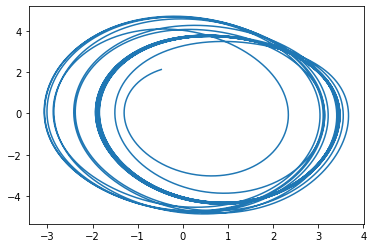

In [5]:
plt.plot(solucion.y[1,100:],solucion.y[2,100:])

Text(0, 0.5, 'y')

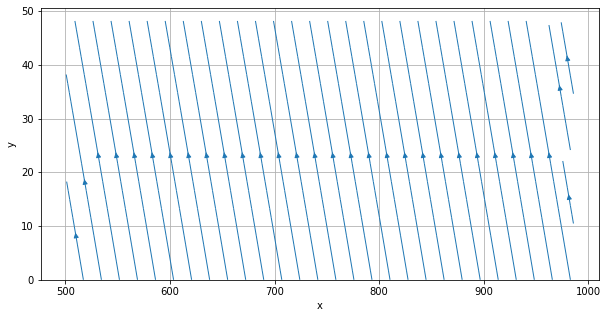

In [12]:
eje = np.arange(0,20,0.01)
x = np.arange(500,1000,1)
y = np.arange(0,50,1)

b = 0.2
k   = 0.5 
Q   = 4.0
hr  = 0.04
g   = 1.32
a = 2.22

X,Y = np.meshgrid(x,y) 
plt.figure(figsize=(10,5))
Bx = -g*(X)/(Q*(1-k))
By =  Q*k*(1-k)*(X)/g - Y/Q
plt.streamplot(X,Y,Bx,By,density = 1,linewidth=1,minlength=0.2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

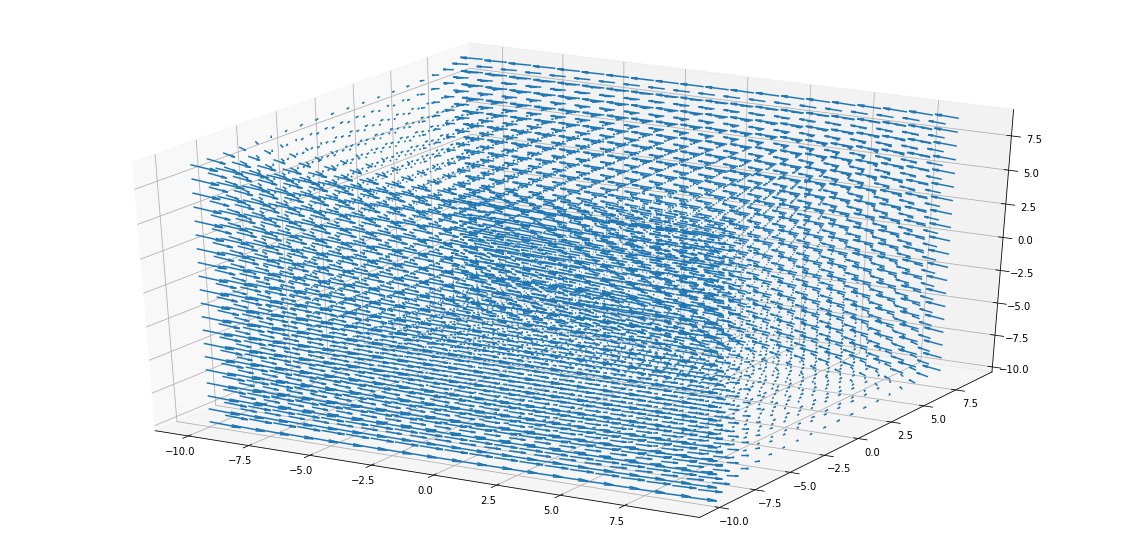

In [7]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1),
                      np.arange(-10, 10, 1))


b = 0.2
k   = 0.5 
Q   = 4.0
hr  = 0.04
g   = 1.32
a = 2.22
u = -g*(z-a*y+b*y**3)/(Q*(1-k))
v = -g*z/(Q*k) -hr*y/(Q*k)
w = Q*k*(1-k)*(x+y)/g - z/Q


ax.quiver(x, y, z, u, v, w, length=0.01)

plt.show()